In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, CuDNNLSTM, Dropout, Flatten
from keras.optimizers import Adam
from keras.datasets import mnist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import config_LSTM as cfg
from labor_katharina import labels, LSTM_funcs
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, StratifiedKFold
import seaborn as sns
from sklearn.metrics import classification_report, make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_curve, plot_confusion_matrix, confusion_matrix
from datetime import datetime
import pickle
import os
import shutil
from sklearn.utils import class_weight
import random

Using TensorFlow backend.


In [3]:
#importing the data
features_orig = pd.read_pickle(cfg.features['path'])
features_orig = features_orig.sort_index()
features_orig = features_orig.reset_index()
features_orig = features_orig.drop(columns=['index'])

if cfg.time_dimension['binning'] == True:
    users = pd.read_pickle(cfg.time_dimension['add_info'])
    features, label = LSTM_funcs.bin_features(features_orig, users, cfg.time_dimension['bin_size'], cfg.features['names'])
else:
    if cfg.time_dimension['version'] == 1:
        features, label = LSTM_funcs.rearrange_features1(features_orig, cfg.features['names'], cfg.time_dimension['length'])
    elif cfg.time_dimension['version'] == 2:
        features, label = LSTM_funcs.rearrange_features2(features_orig, cfg.features['names'], cfg.time_dimension['length'])
    elif cfg.time_dimension['version'] == 3:
        features, label = LSTM_funcs.rearrange_features3(features_orig, cfg.features['names'], cfg.time_dimension['length'], cfg.time_dimension['synthesize'])

#using already arranged data
#features = np.load('./data/features/train/TTD/2020-01-22_17-08-28/LSTM/features.npy')
#label = np.load('./data/features/train/TTD/2020-01-22_17-08-28/LSTM/label.npy')

print('Dimensions of feature vector:', features.shape)
print('Shape of label vector:', label.shape)

Processing user 0 / 1243
Processing user 1 / 1243
Processing user 2 / 1243
Processing user 3 / 1243
Processing user 4 / 1243
Processing user 5 / 1243
Processing user 6 / 1243
Processing user 7 / 1243
Processing user 8 / 1243
Processing user 9 / 1243
Processing user 10 / 1243
Processing user 11 / 1243
Processing user 12 / 1243
Processing user 13 / 1243
Processing user 14 / 1243
Processing user 15 / 1243
Processing user 16 / 1243
Processing user 17 / 1243
Processing user 18 / 1243
Processing user 19 / 1243
Processing user 20 / 1243
Processing user 21 / 1243
Processing user 22 / 1243
Processing user 23 / 1243
Processing user 24 / 1243
Processing user 25 / 1243
Processing user 26 / 1243
Processing user 27 / 1243
Processing user 28 / 1243
Processing user 29 / 1243
Processing user 30 / 1243
Processing user 31 / 1243
Processing user 32 / 1243
Processing user 33 / 1243
Processing user 34 / 1243
Processing user 35 / 1243
Processing user 36 / 1243
Processing user 37 / 1243
Processing user 38 / 1

Processing user 310 / 1243
Processing user 311 / 1243
Processing user 312 / 1243
Processing user 313 / 1243
Processing user 314 / 1243
Processing user 315 / 1243
Processing user 316 / 1243
Processing user 317 / 1243
Processing user 318 / 1243
Processing user 319 / 1243
Processing user 320 / 1243
Processing user 321 / 1243
Processing user 322 / 1243
Processing user 323 / 1243
Processing user 324 / 1243
Processing user 325 / 1243
Processing user 326 / 1243
Processing user 327 / 1243
Processing user 328 / 1243
Processing user 329 / 1243
Processing user 330 / 1243
Processing user 331 / 1243
Processing user 332 / 1243
Processing user 333 / 1243
Processing user 334 / 1243
Processing user 335 / 1243
Processing user 336 / 1243
Processing user 337 / 1243
Processing user 338 / 1243
Processing user 339 / 1243
Processing user 340 / 1243
Processing user 341 / 1243
Processing user 342 / 1243
Processing user 343 / 1243
Processing user 344 / 1243
Processing user 345 / 1243
Processing user 346 / 1243
P

Processing user 614 / 1243
Processing user 615 / 1243
Processing user 616 / 1243
Processing user 617 / 1243
Processing user 618 / 1243
Processing user 619 / 1243
Processing user 620 / 1243
Processing user 621 / 1243
Processing user 622 / 1243
Processing user 623 / 1243
Processing user 624 / 1243
Processing user 625 / 1243
Processing user 626 / 1243
Processing user 627 / 1243
Processing user 628 / 1243
Processing user 629 / 1243
Processing user 630 / 1243
Processing user 631 / 1243
Processing user 632 / 1243
Processing user 633 / 1243
Processing user 634 / 1243
Processing user 635 / 1243
Processing user 636 / 1243
Processing user 637 / 1243
Processing user 638 / 1243
Processing user 639 / 1243
Processing user 640 / 1243
Processing user 641 / 1243
Processing user 642 / 1243
Processing user 643 / 1243
Processing user 644 / 1243
Processing user 645 / 1243
Processing user 646 / 1243
Processing user 647 / 1243
Processing user 648 / 1243
Processing user 649 / 1243
Processing user 650 / 1243
P

Processing user 918 / 1243
Processing user 919 / 1243
Processing user 920 / 1243
Processing user 921 / 1243
Processing user 922 / 1243
Processing user 923 / 1243
Processing user 924 / 1243
Processing user 925 / 1243
Processing user 926 / 1243
Processing user 927 / 1243
Processing user 928 / 1243
Processing user 929 / 1243
Processing user 930 / 1243
Processing user 931 / 1243
Processing user 932 / 1243
Processing user 933 / 1243
Processing user 934 / 1243
Processing user 935 / 1243
Processing user 936 / 1243
Processing user 937 / 1243
Processing user 938 / 1243
Processing user 939 / 1243
Processing user 940 / 1243
Processing user 941 / 1243
Processing user 942 / 1243
Processing user 943 / 1243
Processing user 944 / 1243
Processing user 945 / 1243
Processing user 946 / 1243
Processing user 947 / 1243
Processing user 948 / 1243
Processing user 949 / 1243
Processing user 950 / 1243
Processing user 951 / 1243
Processing user 952 / 1243
Processing user 953 / 1243
Processing user 954 / 1243
P

Processing user 1214 / 1243
Processing user 1215 / 1243
Processing user 1216 / 1243
Processing user 1217 / 1243
Processing user 1218 / 1243
Processing user 1219 / 1243
Processing user 1220 / 1243
Processing user 1221 / 1243
Processing user 1222 / 1243
Processing user 1223 / 1243
Processing user 1224 / 1243
Processing user 1225 / 1243
Processing user 1226 / 1243
Processing user 1227 / 1243
Processing user 1228 / 1243
Processing user 1229 / 1243
Processing user 1230 / 1243
Processing user 1231 / 1243
Processing user 1232 / 1243
Processing user 1233 / 1243
Processing user 1234 / 1243
Processing user 1235 / 1243
Processing user 1236 / 1243
Processing user 1237 / 1243
Processing user 1238 / 1243
Processing user 1239 / 1243
Processing user 1240 / 1243
Processing user 1241 / 1243
Processing user 1242 / 1243
Processing user 1243 / 1243
Dimensions of feature vector: (1244, 50, 13)
Shape of label vector: (1244,)


In [ ]:
#normalize features
X_shape_3d = features.shape
X_shape_2d = (X_shape_3d[0]*X_shape_3d[1], X_shape_3d[2])
X = np.reshape(features, X_shape_2d)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = np.reshape(X, X_shape_3d)

#compute labels
y = labels.TTD_create_LSTM(label, cfg.label['num_classes'])



In [7]:
#class_weight_prev = {i:1-len([a for a in y if a==i])/len(y) for i in range(cfg.label['num_classes'])}z
class_weights = {i:len(y)/(cfg.label['num_classes']*np.bincount(y)[i]) for i in range(cfg.label['num_classes'])}

In [5]:
report = []
conf_matrix = np.zeros((cfg.label['num_classes'],cfg.label['num_classes']))
hist = []

if cfg.validation['type'] == 'KFold':
    kf = KFold(cfg.validation['splits'])
elif cfg.validation['type'] == 'SKFold':
    kf = StratifiedKFold(cfg.validation['splits'])

for train_index, test_index in kf.split(X,y):
    X_train, y_train = X[train_index,:,:], y[train_index]
    X_test, y_test = X[test_index,:,:], y[test_index]
    
    #Initializing the classifier Network
    classifier = Sequential()

    #Adding the input LSTM network layer
    classifier.add(LSTM(64, input_shape=(X.shape[1:])))#, return_sequences=True))
    #classifier.add(Flatten())

    #Adding the output layer
    classifier.add(Dense(cfg.label['num_classes'], activation='softmax'))

    #Compiling the network
    #classifier.compile(loss='sparse_categorical_crossentropy',
                  #optimizer=Adam(lr=0.001, decay=1e-6),
                 # metrics=['accuracy'] )
    classifier.compile(loss='sparse_categorical_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'] )
    
    #Fitting the data to the model
    history = classifier.fit(X_train,
         y_train,
          epochs=cfg.epochs,
          validation_split=0.2, class_weight=class_weights)
    hist.append(history.history)
    
    y_predict_prob = classifier.predict(X_test)
    y_predict = y_predict_prob.argmax(axis=-1)
    test_loss, test_acc = classifier.evaluate(X_test, y_test)
    print('Test Loss: {}'.format(test_loss))
    print('Test Accuracy: {}'.format(test_acc))
    
    report.append(classification_report(y_test, y_predict, output_dict=True))
    conf_matrix = np.add(conf_matrix, confusion_matrix(y_test, y_predict, normalize='true'))






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 1566 samples, validate on 392 samples
Epoch 1/50
1566/1566 [==============================] - 4s 2ms/step - loss: 0.6651 - acc: 0.5121 - val_loss: 0.7144 - val_acc: 0.0000e+00
Epoch 2/50
1566/1566 [==============================] - 2s 1ms/step - loss: 0.5671 - acc: 0.5511 - val_loss: 0.7151 - val_acc: 0.0000e+00
Epoch 3/50
1566/1566 [==============================] - 2s 2ms/step - loss: 0.5070 - acc: 0.6143 - val_loss: 0.6679 - val_acc: 0.4235
Epoch 4/50
1566/1566 [==============================] - 2s 2ms/step - loss: 0.4548 - acc: 0.8289 - val_loss: 0.5995 - val_acc: 0.7270
Epoch 5/50
1566/1566 [==============================] - 2s 1ms/step - loss: 0.4057 - acc: 0.8927 - val_loss: 0.5286 - val_acc: 0.8214
Epoch 6/50
1566/1566 [==============================] - 2s 1ms/step - loss: 0.3605 - acc: 0.9246 - val_loss: 0.4591 - val_acc: 0.8546
Epoch 7/50
1566/1566 [===================

490/490 [==============================] - 0s 383us/step
Test Loss: 0.9628418092824975
Test Accuracy: 0.7000000002432842
Train on 1566 samples, validate on 392 samples
Epoch 1/50
1566/1566 [==============================] - 5s 3ms/step - loss: 0.6680 - acc: 0.5064 - val_loss: 0.7186 - val_acc: 0.0000e+00
Epoch 2/50
1566/1566 [==============================] - 3s 2ms/step - loss: 0.5939 - acc: 0.5511 - val_loss: 0.7056 - val_acc: 0.0000e+00
Epoch 3/50
1566/1566 [==============================] - 3s 2ms/step - loss: 0.5501 - acc: 0.6475 - val_loss: 0.6480 - val_acc: 0.5255
Epoch 4/50
1566/1566 [==============================] - 3s 2ms/step - loss: 0.5116 - acc: 0.7880 - val_loss: 0.5724 - val_acc: 0.7806
Epoch 5/50
1566/1566 [==============================] - 3s 2ms/step - loss: 0.4754 - acc: 0.8359 - val_loss: 0.4944 - val_acc: 0.8520
Epoch 6/50
1566/1566 [==============================] - 3s 2ms/step - loss: 0.4430 - acc: 0.8627 - val_loss: 0.4339 - val_acc: 0.8776
Epoch 7/50
1566/1566

1566/1566 [==============================] - 4s 2ms/step - loss: 0.3954 - acc: 0.8627 - val_loss: 0.3214 - val_acc: 0.9235
Epoch 9/50
1566/1566 [==============================] - 4s 3ms/step - loss: 0.3812 - acc: 0.8640 - val_loss: 0.2997 - val_acc: 0.9286
Epoch 10/50
1566/1566 [==============================] - 3s 2ms/step - loss: 0.3704 - acc: 0.8665 - val_loss: 0.2754 - val_acc: 0.9337
Epoch 11/50
1566/1566 [==============================] - 4s 2ms/step - loss: 0.3619 - acc: 0.8678 - val_loss: 0.2543 - val_acc: 0.9413
Epoch 12/50
1566/1566 [==============================] - 4s 2ms/step - loss: 0.3550 - acc: 0.8678 - val_loss: 0.2401 - val_acc: 0.9439
Epoch 13/50
1566/1566 [==============================] - 4s 2ms/step - loss: 0.3490 - acc: 0.8697 - val_loss: 0.2227 - val_acc: 0.9464
Epoch 14/50
1566/1566 [==============================] - 3s 2ms/step - loss: 0.3438 - acc: 0.8710 - val_loss: 0.2178 - val_acc: 0.9464
Epoch 15/50
1566/1566 [==============================] - 3s 2ms/step

1567/1567 [==============================] - 3s 2ms/step - loss: 0.3373 - acc: 0.8756 - val_loss: 0.1992 - val_acc: 0.9541
Epoch 18/50
1567/1567 [==============================] - 3s 2ms/step - loss: 0.3334 - acc: 0.8762 - val_loss: 0.1905 - val_acc: 0.9566
Epoch 19/50
1567/1567 [==============================] - 3s 2ms/step - loss: 0.3298 - acc: 0.8749 - val_loss: 0.1802 - val_acc: 0.9617
Epoch 20/50
1567/1567 [==============================] - 3s 2ms/step - loss: 0.3267 - acc: 0.8775 - val_loss: 0.1784 - val_acc: 0.9617
Epoch 21/50
1567/1567 [==============================] - 3s 2ms/step - loss: 0.3238 - acc: 0.8781 - val_loss: 0.1734 - val_acc: 0.9592
Epoch 22/50
1567/1567 [==============================] - 4s 3ms/step - loss: 0.3210 - acc: 0.8800 - val_loss: 0.1642 - val_acc: 0.9592
Epoch 23/50
1567/1567 [==============================] - 3s 2ms/step - loss: 0.3186 - acc: 0.8800 - val_loss: 0.1581 - val_acc: 0.9592
Epoch 24/50
1567/1567 [==============================] - 3s 2ms/ste

1567/1567 [==============================] - 4s 2ms/step - loss: 0.3032 - acc: 0.8839 - val_loss: 0.1358 - val_acc: 0.9694
Epoch 27/50
1567/1567 [==============================] - 4s 2ms/step - loss: 0.3016 - acc: 0.8883 - val_loss: 0.1363 - val_acc: 0.9694
Epoch 28/50
1567/1567 [==============================] - 4s 2ms/step - loss: 0.3000 - acc: 0.8890 - val_loss: 0.1315 - val_acc: 0.9745
Epoch 29/50
1567/1567 [==============================] - 4s 3ms/step - loss: 0.2985 - acc: 0.8883 - val_loss: 0.1303 - val_acc: 0.9745
Epoch 30/50
1567/1567 [==============================] - 4s 2ms/step - loss: 0.2970 - acc: 0.8890 - val_loss: 0.1269 - val_acc: 0.9745
Epoch 31/50
1567/1567 [==============================] - 4s 2ms/step - loss: 0.2956 - acc: 0.8877 - val_loss: 0.1266 - val_acc: 0.9719
Epoch 32/50
1567/1567 [==============================] - 4s 2ms/step - loss: 0.2945 - acc: 0.8890 - val_loss: 0.1201 - val_acc: 0.9745
Epoch 33/50
1567/1567 [==============================] - 4s 2ms/ste

In [6]:
#print and store results
timestamp_path = './data/results/LSTM/' + datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
os.mkdir(timestamp_path)

In [7]:
#summarize report
acc = []
report_dict = {}
[acc.append(d['accuracy']) for d in report]
report_dict.update({'accuracy': {'mean': np.mean(acc), 'std': np.std(acc)}})

for o in ('macro avg', 'weighted avg'):
    tmp = {}
    for i in ('precision', 'recall', 'f1-score'):
        tmp2 = []
        [tmp2.append([d[o][i] for d in report])]
        #print(o, i, tmp2)
        tmp.update({i: {'mean': np.mean(tmp2), 'std': np.std(tmp2)}})
    report_dict.update({o: tmp})


In [8]:
report

[{'0': {'precision': 0.5966386554621849,
   'recall': 0.9861111111111112,
   'f1-score': 0.743455497382199,
   'support': 216},
  '1': {'precision': 0.9774436090225563,
   'recall': 0.4744525547445255,
   'f1-score': 0.6388206388206388,
   'support': 274},
  'accuracy': 0.7,
  'macro avg': {'precision': 0.7870411322423706,
   'recall': 0.7302818329278183,
   'f1-score': 0.6911380681014189,
   'support': 490},
  'weighted avg': {'precision': 0.809578568269413,
   'recall': 0.7,
   'f1-score': 0.6849453927987958,
   'support': 490}},
 {'0': {'precision': 0.9631336405529954,
   'recall': 0.9675925925925926,
   'f1-score': 0.9653579676674365,
   'support': 216},
  '1': {'precision': 0.9743589743589743,
   'recall': 0.9708029197080292,
   'f1-score': 0.9725776965265082,
   'support': 274},
  'accuracy': 0.9693877551020408,
  'macro avg': {'precision': 0.9687463074559849,
   'recall': 0.9691977561503109,
   'f1-score': 0.9689678320969723,
   'support': 490},
  'weighted avg': {'precision': 0

In [9]:
#print report and write to file
filename = timestamp_path + '/results.txt'
f = open(filename, 'w')

f.write('-----------------------------------------------------------\n')
f.write('Accuracy:\t {}{}{}\n'.format(np.around(report_dict['accuracy']['mean'],2), '±', np.around(report_dict['accuracy']['std'],2)))
f.write('-----------------------------------------------------------\n')
f.write('\t\t macro avg \t\t weighted avg\n\n')

f.write('F1-score:\t {}{}{} \t\t {}{}{}\n'.format(np.around(report_dict['macro avg']['f1-score']['mean'],2), '±', np.around(report_dict['macro avg']['f1-score']['std'],2) , 
      np.around(report_dict['weighted avg']['f1-score']['mean'],2),'±', np.around(report_dict['weighted avg']['f1-score']['std'],2), '\n'))


f.write('precision:\t {}{}{} \t\t {}{}{}\n'.format(np.around(report_dict['macro avg']['precision']['mean'],2), '±',np.around(report_dict['macro avg']['precision']['std'],2) , 
      np.around(report_dict['weighted avg']['precision']['mean'],2), '±',np.around(report_dict['weighted avg']['precision']['std'],2)))


f.write('recall:\t\t {}{}{} \t\t {}{}{}\n'.format(np.around(report_dict['macro avg']['recall']['mean'],2), '±', np.around(report_dict['macro avg']['recall']['std'],2),
                                                  np.around(report_dict['weighted avg']['recall']['mean'],2),'±', np.around(report_dict['weighted avg']['recall']['std'],2)))

f.write('-----------------------------------------------------------')
f.close()

#store report
with open(timestamp_path + '/results.pkl', 'wb') as handle:
        pickle.dump(report_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
#store config file
shutil.copyfile('./config_LSTM.py',timestamp_path + '/config_LSTM.py')
os.rename(timestamp_path + '/config_LSTM.py', timestamp_path + '/config_LSTM.txt')

    
#print report
print('-----------------------------------------------------------')
print('Accuracy:\t', np.around(report_dict['accuracy']['mean'],2), '±', np.around(report_dict['accuracy']['std'],2))
print('-----------------------------------------------------------\n')
print('\t\t macro avg \t\t weighted avg\n')

print('F1-score:\t', np.around(report_dict['macro avg']['f1-score']['mean'],2), '±', np.around(report_dict['macro avg']['f1-score']['std'],2) , '\t\t', 
      np.around(report_dict['weighted avg']['f1-score']['mean'],2),'±', np.around(report_dict['weighted avg']['f1-score']['std'],2), '\n')


print('precision:\t', np.around(report_dict['macro avg']['precision']['mean'],2), '±',np.around(report_dict['macro avg']['precision']['std'],2) , '\t\t', 
      np.around(report_dict['weighted avg']['precision']['mean'],2), '±',np.around(report_dict['weighted avg']['precision']['std'],2))


print('recall:\t\t', np.around(report_dict['macro avg']['recall']['mean'],2), '±', np.around(report_dict['macro avg']['recall']['std'],2),
      '\t\t', np.around(report_dict['weighted avg']['recall']['mean'],2),'±', np.around(report_dict['weighted avg']['recall']['std'],2))


print('-----------------------------------------------------------')

-----------------------------------------------------------
Accuracy:	 0.91 ± 0.11
-----------------------------------------------------------

		 macro avg 		 weighted avg

F1-score:	 0.91 ± 0.11 		 0.91 ± 0.11 

precision:	 0.93 ± 0.07 		 0.94 ± 0.06
recall:		 0.92 ± 0.09 		 0.91 ± 0.11
-----------------------------------------------------------


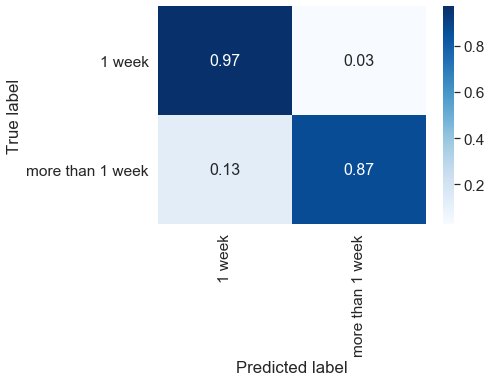

In [10]:
#create label names
label_names = []
label_names.append('1 week')
[label_names.append(str(c) + ' weeks') for c in range(2,cfg.label['num_classes'])]
if cfg.label['num_classes']==2:
    label_names.append('more than '+ str(cfg.label['num_classes']-1)+ ' week')
else:       
    label_names.append('more than '+ str(cfg.label['num_classes']-1)+ ' weeks')


confusion_matrix = np.around(np.divide(conf_matrix, cfg.validation['splits']),2)

#store confusion_matrix
with open(timestamp_path + '/confusion_matrix.pkl', 'wb') as handle:
       pickle.dump(confusion_matrix, handle, protocol=pickle.HIGHEST_PROTOCOL)

#print and store image of confusion matrix
df_cm = pd.DataFrame(confusion_matrix, label_names, label_names)
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap=plt.cm.Blues) # font size
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
plt.savefig(timestamp_path+'/confusion_matrix.pdf', bbox_inches='tight')
plt.show()

In [11]:
val_loss = hist[0]['val_loss']
val_acc = hist[0]['val_acc']
loss = hist[0]['loss']
acc = hist[0]['acc']

hist_en = iter(hist)
next(hist_en)
for _,i in enumerate(hist_en):
    val_loss = [g+h for g,h in zip(i['val_loss'], val_loss)]
    val_acc = [g+h for g,h in zip(i['val_acc'], val_acc)]
    loss = [g+h for g,h in zip(i['loss'], loss)]
    acc = [g+h for g,h in zip(i['acc'], acc)]

val_loss = [g/cfg.validation['splits'] for g in val_loss]
val_acc = [g/cfg.validation['splits'] for g in val_acc]
loss = [g/cfg.validation['splits'] for g in loss]
acc = [g/cfg.validation['splits'] for g in acc]

hist_dict = {'val_loss': val_loss, 'val_acc': val_acc, 'loss': loss, 'acc': acc}

#store report
with open(timestamp_path + '/history.pkl', 'wb') as handle:
        pickle.dump(hist_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

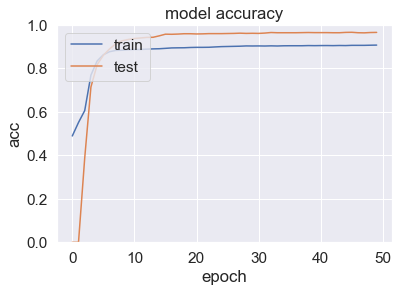

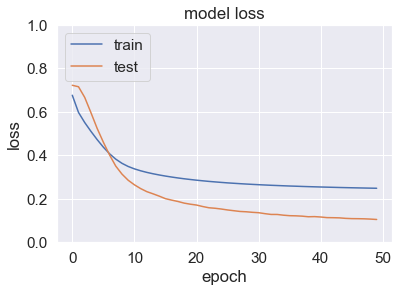

In [12]:
#https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

# summarize history for accuracy
plt.plot(acc)
plt.plot(val_acc)
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.xticks(range(0, cfg.epochs))
plt.ylim([0,1])
plt.savefig(timestamp_path+'/model_accuracy.pdf', bbox_inches='tight')
plt.show()
# summarize history for loss
plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.xticks(range(0, cfg.epochs))
plt.ylim([0, 1])
plt.savefig(timestamp_path+'/model_loss.pdf', bbox_inches='tight')
plt.savefig('./model_loss.pdf', bbox_inches='tight')
plt.show()

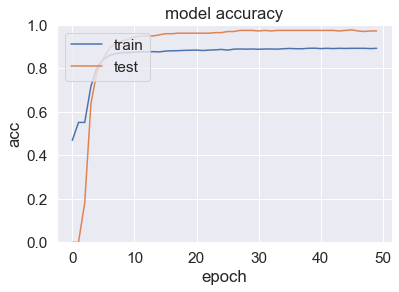

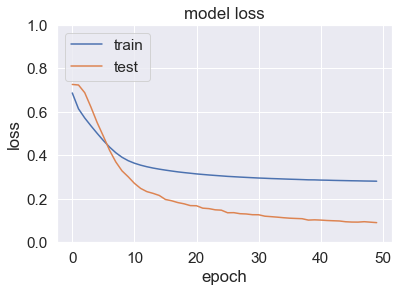

In [13]:
m=4
acc = hist[m]['acc']
val_acc = hist[m]['val_acc']
loss = hist[m]['loss']
val_loss = hist[m]['val_loss']

plt.plot(acc)
plt.plot(val_acc)
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.xticks(range(0, cfg.epochs))
plt.ylim([0,1])
plt.savefig(timestamp_path+'/model_accuracy.pdf', bbox_inches='tight')
plt.show()
# summarize history for loss
plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.xticks(range(0, cfg.epochs))
plt.ylim([0, 1])
plt.savefig(timestamp_path+'/model_loss.pdf', bbox_inches='tight')
plt.savefig('./model_loss.pdf', bbox_inches='tight')
plt.show()